# Klausur

### A1 - Auswahl Datensatz

**Datensatz 2: Vorhersage eines Erkrankungsverlaufs** Menschen mit einer kardiovaskulären Erkrankung oder einem hohen kardiovaskulären Risiko benötigen eine frühzeitige Erkennung und Behandlung, bei der ein maschinelles Lernmodell eine große Hilfe sein kann. Mit welcher Genauigkeit lässt sich aus charakteristischen Patientendaten der tödliche Ausgang einer kardiovaskulären Erkrankung vorhersagen? Welche Merkmale sind die stärksten Einflussfaktoren?

### A2 - Skript- und Datenvorbereitung

##### Einbindung der grundlegenden Python-Bibliotheken

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

##### Datensatz einlesen und Überblick verschaffen

In [2]:
df = pd.read_csv('heart_failure_clinical_dataset.csv')
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [3]:
print("Die Daten enthalten {} Zeilen und {} Spalten".format(df.shape[0], df.shape[1]))

Die Daten enthalten 299 Zeilen und 13 Spalten


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


##### Metadaten-Informationen zusammenstellen
- https://archive.ics.uci.edu/dataset/519/heart+failure+clinical+records
- medizinische Informationen von 299 Patienten mit Herzversagen vom Faisalabad Insitute of Cardiology und dem allierten Krankenhaus in Faisalabad (Punjab, Pakistan) im Zeitraum von April bis Dezember 2015
- 105 Frauen und 194 Männer, zwischen 40 und 95
- alle Patienten hatten eine linke ventrikuläre systolische Dysfunktion und vorheriges Herzversagen (-> sind alle in Klasse III oder IV der New York Heart Association Klassifizierung für die Phasen des Herzversagens)
- https://bmcmedinformdecismak.biomedcentral.com/articles/10.1186/s12911-020-1023-5

##### Datenqualität beurteilen

In [5]:
print("Duplikate: ")
df.duplicated().sum()

Duplikate: 


np.int64(0)

In [6]:
print("Fehlende Daten:")
df.isna().sum()

Fehlende Daten:


age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

##### Bereinigung des Datensatzes



In [7]:
df = df.dropna()
df = df.drop_duplicates()

In [8]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

- Time ist kein Feature sondern eine Zielvariable (siehe https://www.kaggle.com/datasets/rabieelkharoua/predict-survival-of-patients-with-heart-failure/discussion/498685)

In [9]:
df = df.drop(columns=["time"])

##### Festlegung der abhängigen Zielvariable inklusive der Formulierung der Fragestellung

- Zielvariable: DEATH_EVENT
- Fragestellung: Überlebt die Person trotz der fortgeschrittenen Herzerkrankung?

### A3 - EDA

In [10]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
count,224.000000,224.00000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000,224.000000
mean,60.809527,0.46875,336.941964,0.419643,38.178571,0.379464,255865.190045,1.128571,137.044643,0.642857,0.321429,0.272321
std,11.946085,0.50014,279.521085,0.494606,11.710801,0.486340,67153.749051,0.327794,3.806740,0.480231,0.468071,0.446151
min,40.000000,0.00000,30.000000,0.000000,14.000000,0.000000,122000.000000,0.600000,125.000000,0.000000,0.000000,0.000000
25%,50.000000,0.00000,114.500000,0.000000,30.000000,0.000000,210000.000000,0.900000,134.000000,0.000000,0.000000,0.000000
50%,60.000000,0.00000,212.000000,0.000000,38.000000,0.000000,262500.000000,1.100000,137.000000,1.000000,0.000000,0.000000
75%,70.000000,1.00000,582.000000,1.000000,45.000000,1.000000,297250.000000,1.300000,140.000000,1.000000,1.000000,1.000000
max,95.000000,1.00000,1202.000000,1.000000,65.000000,1.000000,427000.000000,2.100000,148.000000,1.000000,1.000000,1.000000


In [ ]:
sns.pairplot(data=df,diag_kind='kde')

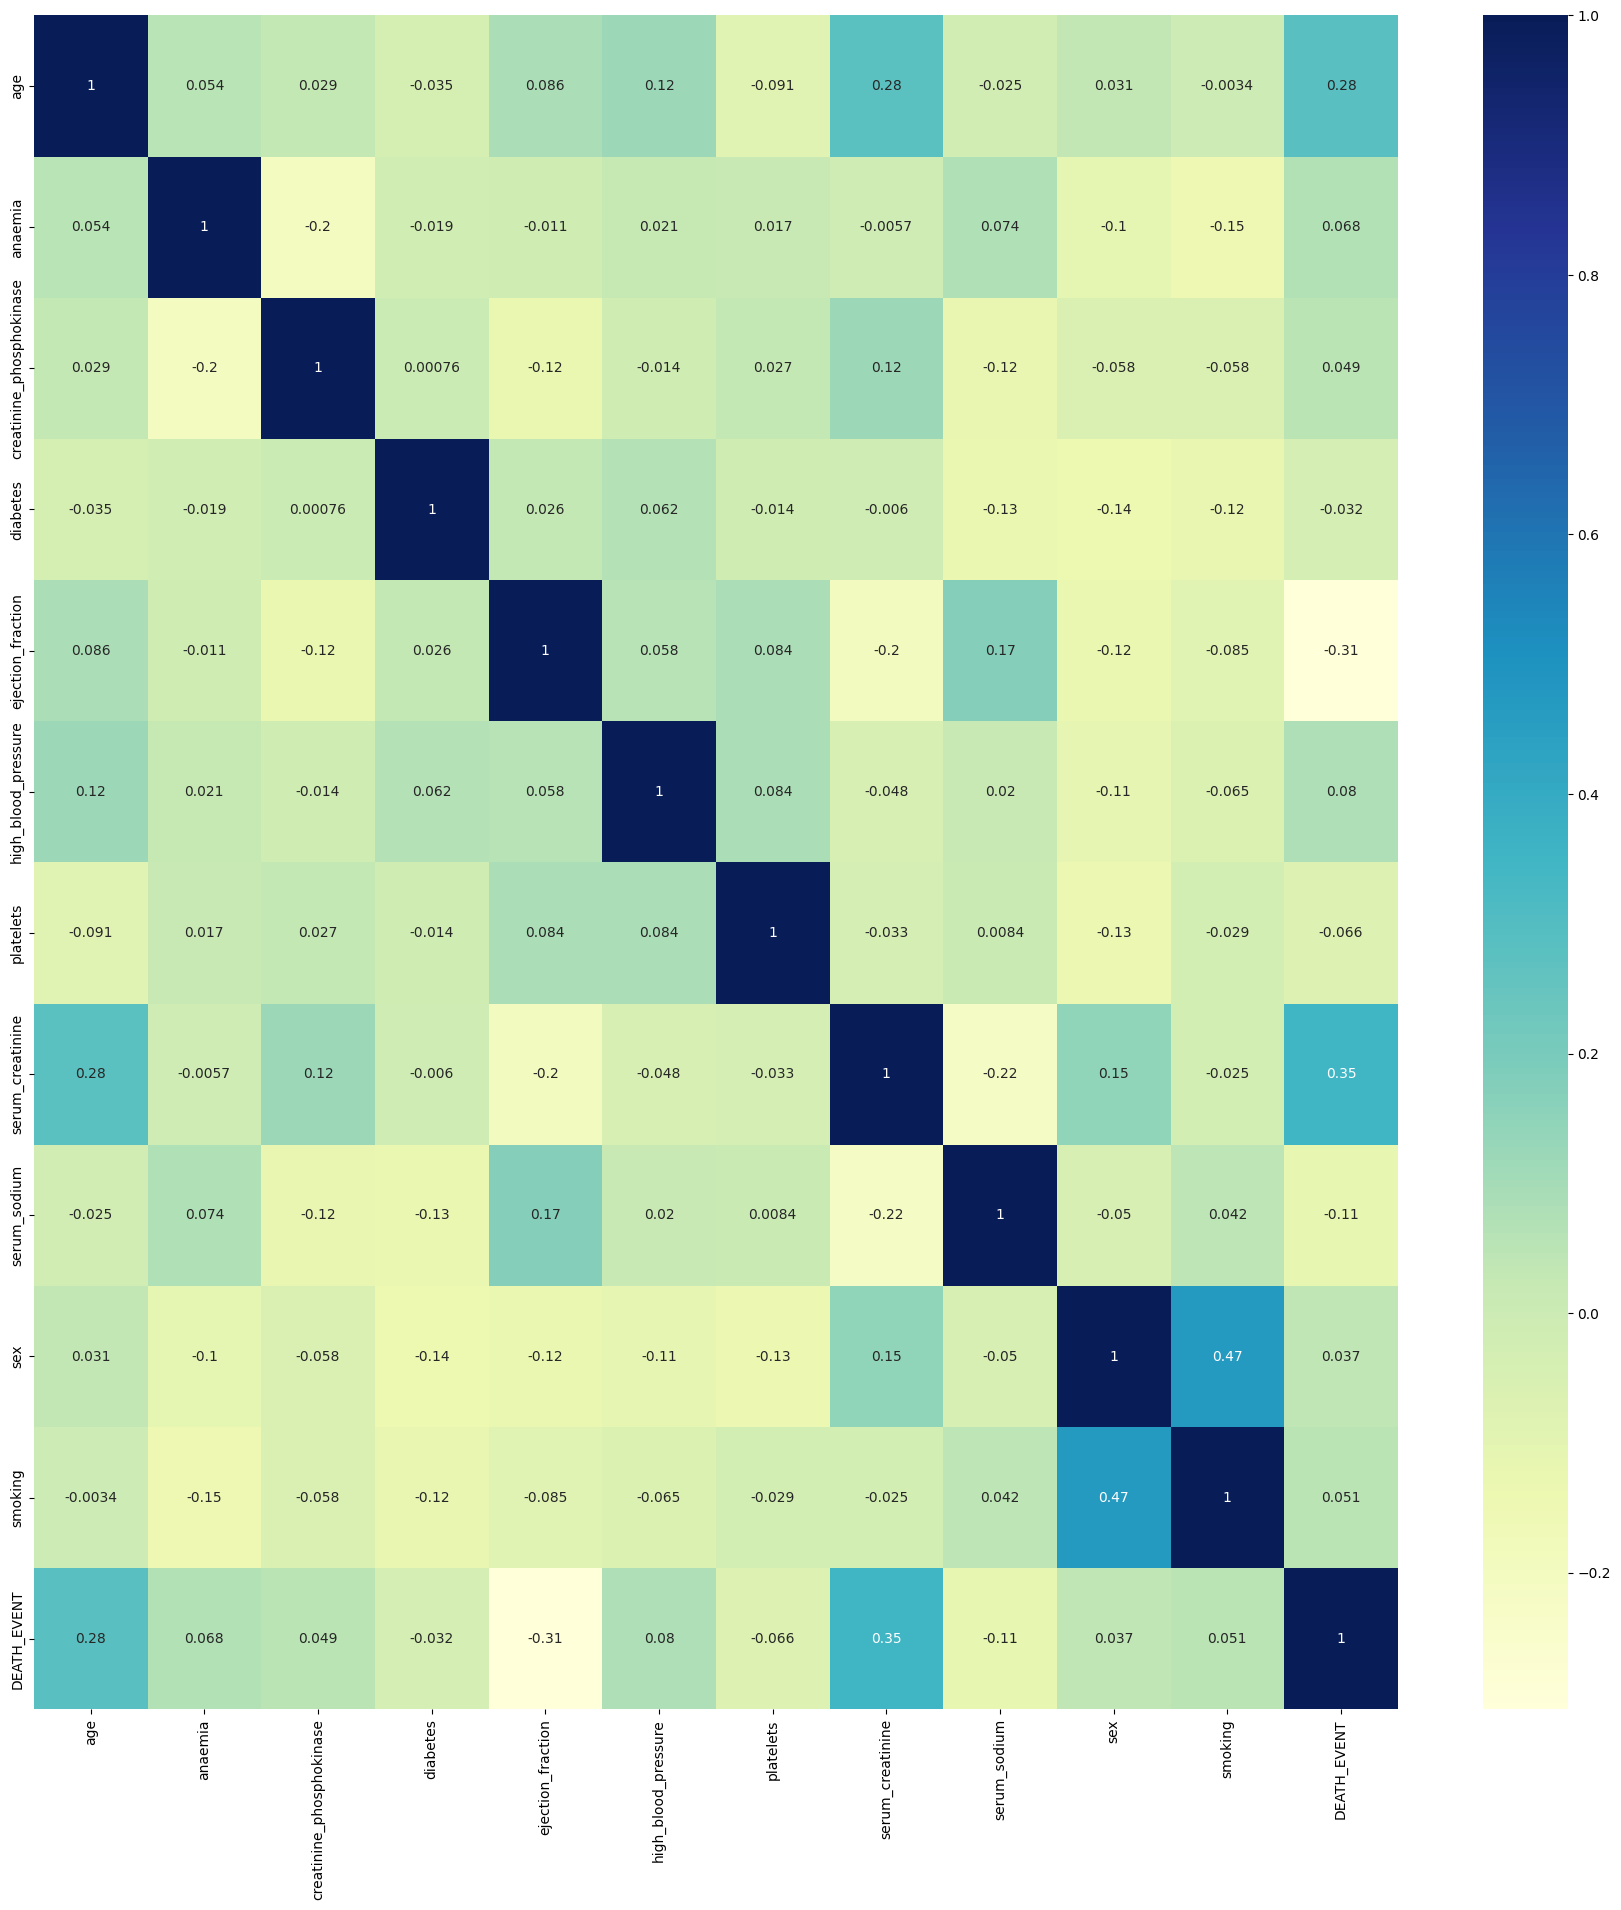

In [12]:
plt.figure(figsize = (22, 22))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()

##### Bereinigung des Datensatzes


In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

sdf = scaler.fit_transform(df)
sdf = pd.DataFrame(sdf, columns=df.columns)

### A4 - Modellierung

ANN, weil
- viele Features mit unterschiedlichen Datentypen
- ANN kann besser nicht-lineare Beziehungen zwischen den Features und der Zielvariable erkennen
- ANN erkennt selbst, welche Featues für die Vorhersage wichtig sind (Medizin ist ein sehr komplexes Thema, erschwert Merkmalsextraktion)

Problem ist allerdings die "geringe" Anzahl an Daten, das könnte zu Overfitting führen
-> es müssen Maßnahmen gegen Overfitting getroffen werden

In [14]:
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.keras.layers import Input
import seaborn as sns
from tensorflow.keras.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE


In [15]:
X = sdf.drop(columns=["DEATH_EVENT"]).values
y = sdf["DEATH_EVENT"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(sampling_strategy=0.5, random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

model = keras.Sequential()
model.add(Input(shape=(X_train.shape[1],)))
keras.layers.Dropout(0.3)
model.add(Dense(32, activation='relu', kernel_regularizer=keras.regularizers.l2(0.015)))
keras.layers.Dropout(0.3)
model.add(Dense(16, activation ='relu', kernel_regularizer=keras.regularizers.l2(0.015)))
keras.layers.Dropout(0.3)
model.add(Dense(8, activation ='relu', kernel_regularizer=keras.regularizers.l2(0.015)))
keras.layers.Dropout(0.3)
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])  # Erhöht das Gewicht für Todesfälle


In [16]:
# 📌 Early Stopping für bessere Generalisierung
early_stop = keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

# 📌 Modell trainieren
model1 = model.fit(X_train, y_train, epochs=300, batch_size=16, 
                    validation_data=(X_test, y_test), 
                    callbacks=[early_stop], verbose=1)

Epoch 1/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - accuracy: 0.3416 - loss: 1.4608 - val_accuracy: 0.2444 - val_loss: 1.3881
Epoch 2/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3766 - loss: 1.3547 - val_accuracy: 0.5111 - val_loss: 1.3016
Epoch 3/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5072 - loss: 1.2854 - val_accuracy: 0.7556 - val_loss: 1.2364
Epoch 4/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.7329 - loss: 1.2254 - val_accuracy: 0.7778 - val_loss: 1.1803
Epoch 5/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6836 - loss: 1.1732 - val_accuracy: 0.7556 - val_loss: 1.1269
Epoch 6/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6597 - loss: 1.1276 - val_accuracy: 0.7556 - val_loss: 1.0771
Epoch 7/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6881 - loss: 1.0778 - val_accuracy: 0.7556 - val_loss: 1.0331
Epoch 8/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6749 - loss: 1.0419 - val_accuracy: 0.

In [17]:
eval_loss, eval_accuracy = model.evaluate(X_test, y_test, verbose=False)
print("Model accuracy: %.2f" % eval_accuracy)

Model accuracy: 0.78


##### Modellergebnis
- Das künstliche neuronale Netz varriert zwischen einer Accuracy von 0,75 und 0,80
- Das Ergebnis ist für ein Studentenprojekt gut, könnte aber in der Praxis so nicht genutzt werden
- Die Vorteile eines neuronalen Netzes zeigen sich auf dem kleinen Datensatz nur bedingt, andere Modelle sind hier zu bevorzugen

##### Generalisierung, Overfitting, Underfitting
- Da durch die "geringe" Anzahl an Daten für das künstliche neuronale Netz Gefahr für Overfitting besteht, wurde diese zusätzlich mit mehreren Verfahren minimiert
    - Dropout zwischen den Neuronenknoten
    - L2-Regularisierung an den Knoten
    - Early-Stop um automatisch die beste Anzahl an Epochen zu finden

- Der Vergleich von der Accuracy bei den Trainings und Validierungsdaten schließt auf eine gute, aber auch verbesserungswürdige Generalisierung
- Underfitting ist sehr unwahrscheinlich (siehe auch nachfolgende Diagramme)
- Overfitting ist ein großes Problem, kann aber mit den oben genannten Methoden minimiert werden

### A5 - Visualisierung

In [18]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,173 (12.40 KB)

 Trainable params: 1,057 (4.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,116 (8.27 KB)

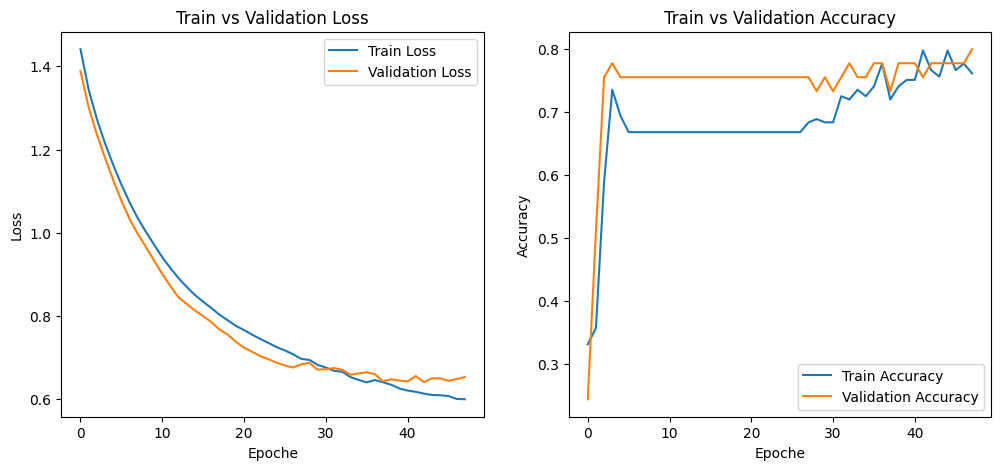

In [19]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(model1.history['loss'], label='Train Loss')
plt.plot(model1.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoche')
plt.ylabel('Loss')
plt.title('Train vs Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(model1.history['accuracy'], label='Train Accuracy')
plt.plot(model1.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoche')
plt.ylabel('Accuracy')
plt.title('Train vs Validation Accuracy')
plt.legend()

plt.show()

In [20]:
losses = pd.DataFrame(model.history.history)
display(losses)

,accuracy,loss,val_accuracy,val_loss
0,0.331606,1.441014,0.244444,1.388083
1,0.357513,1.343950,0.511111,1.301577
2,0.590674,1.273474,0.755556,1.236439
3,0.735751,1.214991,0.777778,1.180287
4,0.694301,1.163035,0.755556,1.126889
5,0.668394,1.115801,0.755556,1.077134
6,0.668394,1.073363,0.755556,1.033073
7,0.668394,1.035133,0.755556,0.997394
8,0.668394,1.002242,0.755556,0.966098
9,0.668394,0.971359,0.755556,0.933128


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step


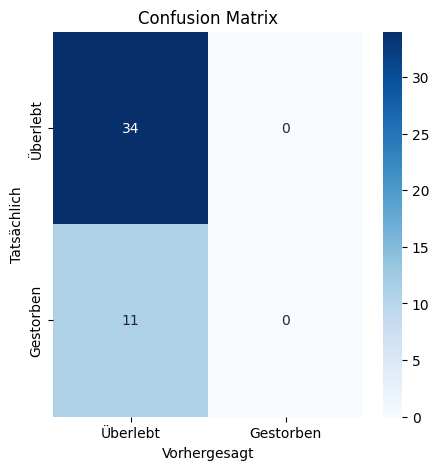

In [21]:
from sklearn.metrics import confusion_matrix, classification_report

y_pred = (model.predict(X_test) > 0.5).astype("int32")
y_pred_classes = np.argmax(y_pred, axis = 1)
y_pred_classes
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Überlebt", "Gestorben"], yticklabels=["Überlebt", "Gestorben"])
plt.xlabel("Vorhergesagt")
plt.ylabel("Tatsächlich")
plt.title("Confusion Matrix")
plt.show()

### A6 - Zusammenfassung und verwendete Quellen

##### Zusammenfassung
- Die Daten zeigen 299 Patienten mit Herzproblemen
- Die Modelle sollen anhand der erhobenen Daten eine möglichst genau und generelle Vorhersage treffen, ob eine Person ihre Krankheit überlebt

Das neuronale Netz kommt auf eine relativ hohe Accuracy, hat aber deutlich Probleme auf dem kleinen Datensatz richtig zum Einsatz zu kommen. Es kämpft mit Overfitting auf der einen (siehe "Train vs Validation" Diagramme) und einer einseitigen Vorhersage von "Überleben" (siehe Confusion Matrix) auf der anderen Seite. Es kann abschließend festgestellt werden,dass ein neuronales Netz auf diesem Datensatz eher ungeignet ist. Die Vorteile können aufgrund des kleinen Datensatzes die Nachteile nicht überwiegen.


##### Was leisten die Modelle?
- Das künstliche neuronale Netz varriert mit der Accuracy zwischen 0,75 und 0,80


##### Vergleichen der Modelle
- gibt momentan nur eins :D


##### Wie gut können die Modelle generalisieren
- Da das neuronale Netz mit vergleichsweise "wenig" Daten arbeiten muss, ist overfitting und eine fehlende Generalisierung ein ernst zu nehmendes Problem
- es wurde deshalb mit verschiedenen Methoden (early stopping, regularization und dropouts) versucht, overfitting entgegenzuwirken und die Fähigkeit zur Generalisierung zu erhöhen


##### Schwachstellen, Fehlereinflüsse und Verbesserungsvorschläge
- Um das neuronale Netz zu verbessern sind mehr Trainingsdaten immer Vorteilhaft
- In den Trainingsdaten gibt es deutlich mehr Überlebende als Tote, das neuronale neigt daher (wie in der Confusion Matrix zu sehen) dazu eher Überleben als Tot vorauszusagen
- Mit SMOTE wurde bereits versucht, diesem Problem entgegenzuwirken. Eventuell sollte aber zusätzlich das Gewicht der einzelnen Knoten geändert werden.

##### Quellen
- https://github.com/geoclaudsch/DASC-01-2025/ (Hauptquelle)
- https://www.kaggle.com/discussions/general/175912 (Techniques to prevent overfitting in Neural Networks)
- https://www.kaggle.com/datasets/rabieelkharoua/predict-survival-of-patients-with-heart-failure/discussion/498685 (Time is not a Feature, its a Target)
- https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.SMOTE.html (SMOTE)
- https://www.tensorflow.org/ (alles mögliche zur Nutzung von TensorFlow)